In [25]:
import numpy as np
import PIL.Image as Image
import cv2
import os
import matplotlib.pyplot as plt
#Try with decision trees
import sklearn         
from sklearn import linear_model, datasets
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [26]:
# Pandas library for the pandas dataframes
import pandas as pd    

# Import Scikit-Learn library for the regression models
import sklearn         
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import numpy 
import numpy as np

# Import plotting libraries
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt

# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})

# Command to automatically reload modules before executing cells
# not needed here but might be if you are writing your own library 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import tifffile as tiff

In [28]:
tiffpath = '4-28-21 Expt2L.tif'

In [29]:

def tif_to_mat(tiffpath):
    im1 = tiff.imread(tiffpath)
    layer,xmax,ymax = im1.shape
    array_avg = []
    arr_max = []
    arr_min = []
    tl_corner = []
    br_corner = []
    bl_corner = []
    tr_corner = []
    meandiff = []
    stv_ar = []
    
    xmax = xmax - 1
    ymax = ymax - 1
    for ii in im1:
        tl_corner = (ii[0,0])
        br_corner = (ii[xmax,ymax])
        bl_corner = (ii[xmax,0])
        tr_corner = (ii[0,ymax])
        #array_avg.append(ii.mean())
        meanres = ii.mean()
        norm_mean = meanres/(tl_corner+br_corner+bl_corner+tr_corner)*4
        array_avg.append(norm_mean)
        #array_avg = array_avg/(tl_corner+br_corner+bl_corner+tr_corner)*4
        arr_max.append(ii.max() / im1[0].max())
        arr_min.append(ii.min() / im1[0].min())
        allstv = np.std(ii)
        stv_ar.append(allstv)
        
        picdiff = ii - im1[0]
        #print(picdiff)
        #tl_corner = (picdiff[0,0])
        ##br_corner = (picdiff[xmax,ymax])
        #bl_corner = (picdiff[xmax,0])
        #tr_corner = (picdiff[0,ymax])
        
        
        #norm_value = (tl_corner+br_corner+bl_corner+tr_corner)
        #if norm_value!= 0:
        #    norm_mean_diff = picdiff.mean()*4/norm_value
        #else:
        #    norm_mean_diff = 0
        meandiff.append(picdiff.mean())
        
    #print(np.shape(array_avg))
    aindexs = np.arange(0,1200,1)
    marrays = [aindexs,array_avg,arr_max,arr_min,meandiff,stv_ar]
    rsars = np.array(marrays)
    newshape = rsars.transpose()
    
    return newshape

In [80]:
tiffpath = 'All/30 cps/4-14-21 Expt 2L.tif'

In [81]:
im1 = tiff.imread(tiffpath)

In [82]:
np.std(im1[0])

206.88093129818975

In [73]:
im1 = tiff.imread(tiffpath)

In [74]:
im1[0].max()

5015

In [79]:
newshape = tif_to_mat(tiffpath)
np.shape(newshape)

(1200, 6)

In [84]:
import unittest

class Test_tiffsize(unittest.TestCase):

    #We can test if the input tiff images have same size
    def test_failure(self):
        tiffpath1 = 'All/30 cps/4-14-21 Expt 2R.tif'
        tiffpath2 = 'All/30 cps/4-14-21 Expt 2R.tif'
        newshape1 = tif_to_mat(tiffpath1)
        newshape2 = tif_to_mat(tiffpath2)
        assert np.shape(newshape1) == np.shape(newshape2), 'The images have different size'
        
suite = unittest.TestLoader().loadTestsFromTestCase(Test_tiffsize)
_ = unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.771s

OK


In [66]:
df = pd.DataFrame(newshape, columns = ['image ID','Average Value','maximum','arr_min','meandiff','stdev'])
#X = df.loc[:, df.columns!='image ID']
X = df['meandiff'].values.reshape(-1, 1)
y = df['image ID'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=98, shuffle=True)

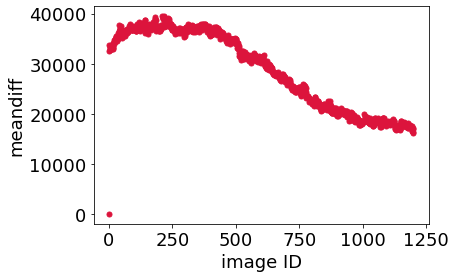

In [67]:
# Using the pandas plot.scatter
df.plot.scatter('image ID', 'meandiff', s=100, marker='.', color="crimson")
plt.show()

In [42]:
X_train.shape

(840, 1)

In [85]:
# Declare regressor object & train it
def regr_func (X_train,y_train,depths):
    regr = DecisionTreeRegressor(random_state=0,max_depth=depths)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    #print("Prediction accuracy MSE: ", MSE)
    #print("R2 score: ", R2)
    return MSE,R2

In [86]:
np.arange(1,30,1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [87]:
depths_array = np.arange(2,40,2)
MSE_array = []
R2_array = []

for dps in depths_array:
    res = regr_func (X_train,y_train,dps)
    MSE_array.append(res[0])
    R2_array.append(res[1])
    
print('MSE:',MSE_array)
print('R2:',R2_array)

MSE: [15283.966964393683, 12788.648143053979, 13627.989400473229, 16126.685288929888, 17879.28517423869, 19224.215436647868, 19946.65419557823, 20256.583505658436, 20458.67058950617, 20776.02249228395, 21112.255555555555, 21112.255555555555, 21112.255555555555, 21112.255555555555, 21112.255555555555, 21112.255555555555, 21112.255555555555, 21112.255555555555, 21112.255555555555]
R2: [0.8705664700664525, 0.891698282514624, 0.8845902521178215, 0.8634298406993179, 0.848587804581004, 0.8371981521574143, 0.8310801201735054, 0.8284554583480117, 0.826744067275437, 0.8240565466138609, 0.8212091292934101, 0.8212091292934101, 0.8212091292934101, 0.8212091292934101, 0.8212091292934101, 0.8212091292934101, 0.8212091292934101, 0.8212091292934101, 0.8212091292934101]


In [93]:
MSEmin = np.argmin(MSE_array)
R2max = np.argmax(R2_array)

In [89]:
print('MSE:',min(MSE_array))
print('R2:',max(R2_array))

MSE: 12788.648143053979
R2: 0.891698282514624


In [95]:
import unittest

class Test_lowestmse(unittest.TestCase):

    #We can test if the max_depth value used is the most accurate one
    def test_failure(self):
        depths_array = np.arange(2,40,2)
        MSE_array = []
        R2_array = []

        for dps in depths_array:
            res = regr_func (X_train,y_train,dps)
            MSE_array.append(res[0])
            R2_array.append(res[1])
        assert min(MSE_array) < max(MSE_array), 'The max_depth value was not correct'
        
suite = unittest.TestLoader().loadTestsFromTestCase(Test_lowestmse)
_ = unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.030s

OK


In [48]:
print(MSEmin,R2max)

1 1


In [49]:
depths_array[MSEmin]

4

Text(0.5, 1.0, 'Decision Tree Regressor Accuracy Dependence on Depths')

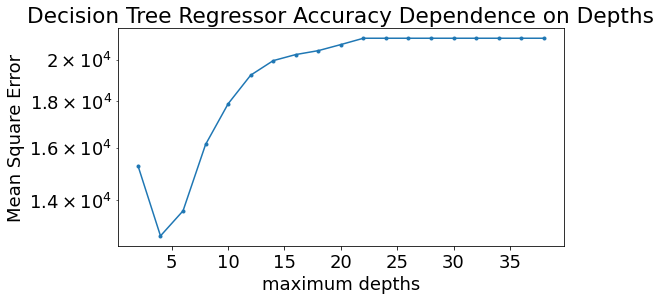

In [90]:
fig = plt.figure(figsize=[8,4])
plt.plot(depths_array,MSE_array,'.-')
plt.yscale('log')
plt.xlabel('maximum depths')
plt.ylabel('Mean Square Error')
plt.title('Decision Tree Regressor Accuracy Dependence on Depths')

In [91]:
#Using the best depth for model:
#train the model 
regr = DecisionTreeRegressor(random_state=0,max_depth=depths_array[MSEmin])
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

In [53]:
print(MSE,R2)

12788.648143053979 0.891698282514624


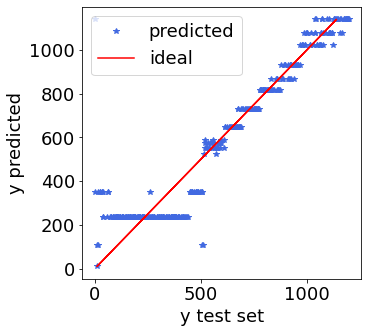

In [54]:
plt.figure(figsize=(5,5))
plt.plot(y_test, y_pred,'*', color='royalblue', label="predicted")
plt.plot(y_pred, y_pred,'-', color='red', label="ideal")
plt.xlabel('y test set')
plt.ylabel('y predicted')
plt.legend()
plt.show()

In [144]:
path2 = 'All/10,000 cps/4-28-21 Expt2R.tif'

In [145]:
mat2 = tif_to_mat(path2)

In [109]:
def foldername_sorting(foldername):
    list_names = os.listdir(foldername)
    datas = []
    pathes = []
    imname_all = []
    pathes_only = []
    names_inter = []
    i=0
    for names in list_names:
        imanames = os.listdir(foldername+'/'+names)
        for j in range(0,len(imanames)+1):
            try:
                pathes.append(foldername+'/'+names+'/'+imanames[j])
                imname_all.append(imanames[j])
                pathes_only.append(foldername+'/'+names)
                names_inter.append(names)
            except:
                pass
        #datas.append(cv2.imread(upper_foldername+foldername+'/'+names+'/'+imanames[0]))
        i+=1
    return pathes,imname_all,pathes_only,names_inter

In [113]:
pathes,imname_all,pathes_only,names_inter = foldername_sorting('All')

In [114]:
print(pathes,names_inter)

['All/100,000 cps/4-12-21 Expt 1.tif', 'All/100,000 cps/4-12-21 Expt 2L.tif', 'All/100,000 cps/4-12-21 Expt 2R.tif', 'All/30,000 cps/4-28-21 Expt 3R.tif', 'All/30,000 cps/4-12-21 Expt 3R.tif', 'All/100 cps/4-13-21 Expt 2L.tif', 'All/100 cps/4-14-21 Expt 1L.tif', 'All/300 cps/4-13-21 Expt 4L.tif', 'All/300 cps/4-13-21 Expt 3L.tif', 'All/300 cps/4-13-21 Expt 3R.tif', 'All/10,000 cps/4-28-21 Expt2R.tif', 'All/10,000 cps/4-28-21 Expt 1R.tif', 'All/10,000 cps/on 150ul pad, 1e4_5Avg.tif', 'All/10,000 cps/4-28-21 Expt2L.tif', 'All/3,000 cps/4-12-21 Expt 4L.tif', 'All/3,000 cps/4-28-21 Expt 3L.tif', 'All/3,000 cps/4-12-21 Expt 4R.tif', 'All/30 cps/4-14-21 Expt 2L.tif', 'All/30 cps/4-14-21 Expt 1L.tif', 'All/30 cps/4-14-21 Expt 2R.tif', 'All/1,000 cps/4-13-21 Expt 1R.tif', 'All/1,000 cps/4-12-21 Expt 3L.tif', 'All/1,000 cps/4-13-21 Expt 1L.tif'] ['100,000 cps', '100,000 cps', '100,000 cps', '30,000 cps', '30,000 cps', '100 cps', '100 cps', '300 cps', '300 cps', '300 cps', '10,000 cps', '10,000 

In [135]:
import unittest

class Test_pathsize(unittest.TestCase):

    #We can test if the input path size is correct
    def test_failure(self):
        def foldername_sorting(foldername):
            list_names = os.listdir(foldername)
            datas = []
            pathes = []
            imname_all = []
            pathes_only = []
            names_inter = []
            i=0
            for names in list_names:
                imanames = os.listdir(foldername+'/'+names)
                for j in range(0,len(imanames)+1):
                    try:
                        pathes.append(foldername+'/'+names+'/'+imanames[j])
                        imname_all.append(imanames[j])
                        pathes_only.append(foldername+'/'+names)
                        names_inter.append(names)
                    except:
                        pass
                i+=1
            return pathes,imname_all,pathes_only,names_inter
        assert len(pathes) == len(pathes_only), 'The path numbers are incorrect'
        
suite = unittest.TestLoader().loadTestsFromTestCase(Test_pathsize)
_ = unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [137]:
trainnames = []
trainpath = []
traincps = []
testnames = []
testpath = []
testcps = []
i=0
for names in imname_all:
    if 'L' in names:
        trainnames.append(names)
        trainpath.append(pathes[i])
        traincps.append(names_inter[i])
        
    elif 'R' in names:
        testnames.append(names)
        testpath.append(pathes[i])
        testcps.append(names_inter[i])
    else:
        pass
    
    i += 1

In [138]:
trainpath

['All/100,000 cps/4-12-21 Expt 2L.tif',
 'All/100 cps/4-13-21 Expt 2L.tif',
 'All/100 cps/4-14-21 Expt 1L.tif',
 'All/300 cps/4-13-21 Expt 4L.tif',
 'All/300 cps/4-13-21 Expt 3L.tif',
 'All/10,000 cps/4-28-21 Expt2L.tif',
 'All/3,000 cps/4-12-21 Expt 4L.tif',
 'All/3,000 cps/4-28-21 Expt 3L.tif',
 'All/30 cps/4-14-21 Expt 2L.tif',
 'All/30 cps/4-14-21 Expt 1L.tif',
 'All/1,000 cps/4-12-21 Expt 3L.tif',
 'All/1,000 cps/4-13-21 Expt 1L.tif']

In [139]:
testpath

['All/100,000 cps/4-12-21 Expt 2R.tif',
 'All/30,000 cps/4-28-21 Expt 3R.tif',
 'All/30,000 cps/4-12-21 Expt 3R.tif',
 'All/300 cps/4-13-21 Expt 3R.tif',
 'All/10,000 cps/4-28-21 Expt2R.tif',
 'All/10,000 cps/4-28-21 Expt 1R.tif',
 'All/3,000 cps/4-12-21 Expt 4R.tif',
 'All/30 cps/4-14-21 Expt 2R.tif',
 'All/1,000 cps/4-13-21 Expt 1R.tif']

In [149]:
def modeltest_withpics(path2):
    mat2 = tif_to_mat(path2)
    df2 = pd.DataFrame(mat2, columns = ['image ID','Average Value','maximum'])
    df2.plot.scatter('image ID', 'Average Value', s=100, marker='.', color="crimson",title='original value')
    plt.show()
    X2 = df2['image ID'].values.reshape(-1, 1)
    y2 = df2['Average Value'].values.reshape(-1, 1)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=98, shuffle=True)
    y_pred2 = regr.predict(X_test2)
    plt.scatter(X_test2,y_pred2,label="predicted",alpha = 1)
    plt.scatter(X_test2,y_test2,label = 'test',alpha = 0.5)
    plt.xlabel('y test set')
    plt.ylabel('y predicted')
    plt.legend()
    plt.show()
    plt.scatter(X_test2,y_pred2,label="predicted",alpha = 1)
    MSE = mean_squared_error(y_test2, y_pred2)
    R2 = r2_score(y_test2, y_pred2)
    print()
    print('MSE =',MSE)
    print('R2 =',R2)

In [180]:
import unittest

class Test_modeltest(unittest.TestCase):

    #We can test if the modeltest & modelmake function is working properly
    def test_modeltest(self):
        def modeltest(regr,path2):
            mat2 = tif_to_mat(path2)
            df2 = pd.DataFrame(mat2, columns = ['image ID','Average Value','maximum','arr_min','meandiff','stdev'])
            X2 = df2.loc[:, df.columns!='image ID']
            y2 = df2['image ID'].values.reshape(-1, 1)
            X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.9, random_state=98, shuffle=True)
            y_pred2 = regr.predict(X_test2)
            MSE = mean_squared_error(y_test2, y_pred2)
            R2 = r2_score(y_test2, y_pred2)
            return MSE,R2

        def makemodel(path):
            mat = tif_to_mat(path)
            df = pd.DataFrame(mat, columns = ['image ID','Average Value','maximum','arr_min','meandiff','stdev'])
            X = df.loc[:, df.columns!='image ID']
    
            y = df['image ID'].values.reshape(-1, 1)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=98, shuffle=True)
            def regr_func (X_train,y_train,depths):
                regr = DecisionTreeRegressor(random_state=0,max_depth=depths)
                regr.fit(X_train, y_train)
                y_pred = regr.predict(X_test)
                MSE = mean_squared_error(y_test, y_pred)
                R2 = r2_score(y_test, y_pred)
 
                return MSE,R2
            depths_array = np.arange(2,40,2)
            MSE_array = []
            R2_array = []
 
            for dps in depths_array:
                res = regr_func (X_train,y_train,dps)
                MSE_array.append(res[0])
                R2_array.append(res[1])
            MSEmin = np.argmin(MSE_array)
            R2max = np.argmax(R2_array)
    
            regr = DecisionTreeRegressor(random_state=0,max_depth=depths_array[MSEmin])
            regr.fit(X_train, y_train)
            y_pred = regr.predict(X_test)
            MSE = mean_squared_error(y_test, y_pred)
            R2 = r2_score(y_test, y_pred)
            print('R2 score is: ',R2)
            if R2 <0.9:
                print('Warning! Model not good')
            return regr
        
        
        assert len(modeltest(model,testpath[0])) != 1, 'The path model making and test processes are incorrect'
        
suite = unittest.TestLoader().loadTestsFromTestCase(Test_modeltest)
_ = unittest.TextTestRunner().run(suite)

.
----------------------------------------------------------------------
Ran 1 test in 0.389s

OK


In [147]:
def modeltest(regr,path2):
    mat2 = tif_to_mat(path2)
    df2 = pd.DataFrame(mat2, columns = ['image ID','Average Value','maximum','arr_min','meandiff','stdev'])
    X2 = df2.loc[:, df.columns!='image ID']
    y2 = df2['image ID'].values.reshape(-1, 1)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.9, random_state=98, shuffle=True)
    y_pred2 = regr.predict(X_test2)
    MSE = mean_squared_error(y_test2, y_pred2)
    R2 = r2_score(y_test2, y_pred2)
    return MSE,R2

In [150]:
def makemodel(path):
    mat = tif_to_mat(path)
    df = pd.DataFrame(mat, columns = ['image ID','Average Value','maximum','arr_min','meandiff','stdev'])
    X = df.loc[:, df.columns!='image ID']
    
    y = df['image ID'].values.reshape(-1, 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=98, shuffle=True)
    def regr_func (X_train,y_train,depths):
        regr = DecisionTreeRegressor(random_state=0,max_depth=depths)
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        MSE = mean_squared_error(y_test, y_pred)
        R2 = r2_score(y_test, y_pred)
    #print("Prediction accuracy MSE: ", MSE)
    #print("R2 score: ", R2)
        return MSE,R2
    depths_array = np.arange(2,40,2)
    MSE_array = []
    R2_array = []

    for dps in depths_array:
        res = regr_func (X_train,y_train,dps)
        MSE_array.append(res[0])
        R2_array.append(res[1])
    MSEmin = np.argmin(MSE_array)
    R2max = np.argmax(R2_array)
    
    regr = DecisionTreeRegressor(random_state=0,max_depth=depths_array[MSEmin])
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    print('R2 score is: ',R2)
    if R2 <0.9:
        print('Warning! Model not good')
    return regr
    #y_pred = regr.predict(X_test)
    #MSE = mean_squared_error(y_test, y_pred)
    #R2 = r2_score(y_test, y_pred)

In [151]:
testpath

['All/100,000 cps/4-12-21 Expt 2R.tif',
 'All/30,000 cps/4-28-21 Expt 3R.tif',
 'All/30,000 cps/4-12-21 Expt 3R.tif',
 'All/300 cps/4-13-21 Expt 3R.tif',
 'All/10,000 cps/4-28-21 Expt2R.tif',
 'All/10,000 cps/4-28-21 Expt 1R.tif',
 'All/3,000 cps/4-12-21 Expt 4R.tif',
 'All/30 cps/4-14-21 Expt 2R.tif',
 'All/1,000 cps/4-13-21 Expt 1R.tif']

In [152]:
trainpath

['All/100,000 cps/4-12-21 Expt 2L.tif',
 'All/100 cps/4-13-21 Expt 2L.tif',
 'All/100 cps/4-14-21 Expt 1L.tif',
 'All/300 cps/4-13-21 Expt 4L.tif',
 'All/300 cps/4-13-21 Expt 3L.tif',
 'All/10,000 cps/4-28-21 Expt2L.tif',
 'All/3,000 cps/4-12-21 Expt 4L.tif',
 'All/3,000 cps/4-28-21 Expt 3L.tif',
 'All/30 cps/4-14-21 Expt 2L.tif',
 'All/30 cps/4-14-21 Expt 1L.tif',
 'All/1,000 cps/4-12-21 Expt 3L.tif',
 'All/1,000 cps/4-13-21 Expt 1L.tif']

In [153]:
testcps

['100,000 cps',
 '30,000 cps',
 '30,000 cps',
 '300 cps',
 '10,000 cps',
 '10,000 cps',
 '3,000 cps',
 '30 cps',
 '1,000 cps']

In [154]:
trainidx = [0,2,3,4,5,7,9,10]

In [155]:
trainin = []
trainincps = []
for idx in trainidx:
    trainin.append(trainpath[idx])
    trainincps.append(traincps[idx])

In [156]:
trainincps

['100,000 cps',
 '100 cps',
 '300 cps',
 '300 cps',
 '10,000 cps',
 '3,000 cps',
 '30 cps',
 '1,000 cps']

In [157]:
trainin

['All/100,000 cps/4-12-21 Expt 2L.tif',
 'All/100 cps/4-14-21 Expt 1L.tif',
 'All/300 cps/4-13-21 Expt 4L.tif',
 'All/300 cps/4-13-21 Expt 3L.tif',
 'All/10,000 cps/4-28-21 Expt2L.tif',
 'All/3,000 cps/4-28-21 Expt 3L.tif',
 'All/30 cps/4-14-21 Expt 1L.tif',
 'All/1,000 cps/4-12-21 Expt 3L.tif']

In [158]:
trainin[0:1]

['All/100,000 cps/4-12-21 Expt 2L.tif']

In [159]:
testpath

['All/100,000 cps/4-12-21 Expt 2R.tif',
 'All/30,000 cps/4-28-21 Expt 3R.tif',
 'All/30,000 cps/4-12-21 Expt 3R.tif',
 'All/300 cps/4-13-21 Expt 3R.tif',
 'All/10,000 cps/4-28-21 Expt2R.tif',
 'All/10,000 cps/4-28-21 Expt 1R.tif',
 'All/3,000 cps/4-12-21 Expt 4R.tif',
 'All/30 cps/4-14-21 Expt 2R.tif',
 'All/1,000 cps/4-13-21 Expt 1R.tif']

In [160]:
model = makemodel(trainin[0])

R2 score is:  0.9988669944919562


In [161]:
modeltest(model,testpath[0])

(70304.59976851851, 0.41448774579859005)

In [162]:
modeltest(model,testpath[1])

(136621.0788773148, -0.13781055760600736)

In [163]:
testpath

['All/100,000 cps/4-12-21 Expt 2R.tif',
 'All/30,000 cps/4-28-21 Expt 3R.tif',
 'All/30,000 cps/4-12-21 Expt 3R.tif',
 'All/300 cps/4-13-21 Expt 3R.tif',
 'All/10,000 cps/4-28-21 Expt2R.tif',
 'All/10,000 cps/4-28-21 Expt 1R.tif',
 'All/3,000 cps/4-12-21 Expt 4R.tif',
 'All/30 cps/4-14-21 Expt 2R.tif',
 'All/1,000 cps/4-13-21 Expt 1R.tif']

In [164]:
i = 0
MSEmat = []
R2mat = []
for paths in trainin:
    print(paths)
    model = makemodel(paths)
    MSEarray = []
    R2array = []
    for path2 in testpath:
        MSE,R2 = modeltest(model,path2)
        #print(R2)
        MSEarray.append(MSE)
        R2array.append(R2)
        del MSE,R2
    MSEmat.append(MSEarray)
    R2mat.append(R2array)

All/100,000 cps/4-12-21 Expt 2L.tif
R2 score is:  0.9988669944919562
All/100 cps/4-14-21 Expt 1L.tif
R2 score is:  0.9994617256014383
All/300 cps/4-13-21 Expt 4L.tif
R2 score is:  0.9964189284529346
All/300 cps/4-13-21 Expt 3L.tif
R2 score is:  0.9981441958771583
All/10,000 cps/4-28-21 Expt2L.tif
R2 score is:  0.9974384299768365
All/3,000 cps/4-28-21 Expt 3L.tif
R2 score is:  0.9898706032282962
All/30 cps/4-14-21 Expt 1L.tif
R2 score is:  0.9331334534807435
All/1,000 cps/4-12-21 Expt 3L.tif
R2 score is:  0.9915557888017166


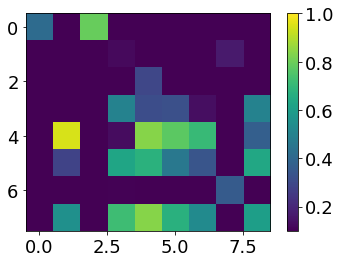

In [165]:
shw = plt.imshow(np.array(R2mat))
bar = plt.colorbar(shw)
plt.clim(0.1,1)


In [166]:
R2mat = np.round(R2mat,5)

In [167]:
np.round(R2mat,2)

array([[ 0.41, -0.14,  0.79, -0.71, -0.38, -0.24,  0.1 , -0.95, -0.59],
       [-0.69, -0.3 , -0.73,  0.12, -0.  , -0.1 , -0.25,  0.17,  0.05],
       [-0.44,  0.08, -0.52,  0.08,  0.29, -0.03, -0.04,  0.09,  0.08],
       [-0.3 ,  0.05, -0.48,  0.5 ,  0.31,  0.32,  0.13,  0.08,  0.5 ],
       [ 0.04,  0.95, -0.07,  0.13,  0.83,  0.77,  0.71, -0.18,  0.37],
       [-0.35,  0.28, -0.35,  0.63,  0.67,  0.46,  0.34, -0.16,  0.64],
       [-0.8 , -0.45, -0.87,  0.11, -0.1 , -0.29, -0.53,  0.36, -0.3 ],
       [-0.13,  0.55, -0.24,  0.72,  0.84,  0.67,  0.53, -0.11,  0.61]])

In [168]:
R2mat_test = np.round(R2mat,3)

In [169]:
R2mat_test

array([[ 0.414, -0.138,  0.791, -0.706, -0.384, -0.245,  0.101, -0.947,
        -0.587],
       [-0.694, -0.295, -0.73 ,  0.123, -0.   , -0.101, -0.254,  0.165,
         0.05 ],
       [-0.439,  0.079, -0.518,  0.076,  0.29 , -0.027, -0.042,  0.092,
         0.083],
       [-0.297,  0.046, -0.479,  0.498,  0.313,  0.321,  0.134,  0.079,
         0.499],
       [ 0.039,  0.947, -0.072,  0.129,  0.835,  0.773,  0.708, -0.181,
         0.374],
       [-0.347,  0.283, -0.352,  0.629,  0.674,  0.462,  0.337, -0.156,
         0.639],
       [-0.798, -0.452, -0.869,  0.107, -0.102, -0.293, -0.532,  0.36 ,
        -0.298],
       [-0.13 ,  0.553, -0.238,  0.72 ,  0.837,  0.67 ,  0.529, -0.11 ,
         0.606]])

In [170]:
i=0
j=0
R2mat_test = np.round(R2mat,3)
for ars in R2mat_test:
    for v in ars:
        if v <= 0:
            R2mat_test[i][j] = 0
            
        else:
            pass
        j+=1
    i+=1
    j=0

In [171]:
R2mat_test

array([[0.414, 0.   , 0.791, 0.   , 0.   , 0.   , 0.101, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.123, 0.   , 0.   , 0.   , 0.165, 0.05 ],
       [0.   , 0.079, 0.   , 0.076, 0.29 , 0.   , 0.   , 0.092, 0.083],
       [0.   , 0.046, 0.   , 0.498, 0.313, 0.321, 0.134, 0.079, 0.499],
       [0.039, 0.947, 0.   , 0.129, 0.835, 0.773, 0.708, 0.   , 0.374],
       [0.   , 0.283, 0.   , 0.629, 0.674, 0.462, 0.337, 0.   , 0.639],
       [0.   , 0.   , 0.   , 0.107, 0.   , 0.   , 0.   , 0.36 , 0.   ],
       [0.   , 0.553, 0.   , 0.72 , 0.837, 0.67 , 0.529, 0.   , 0.606]])

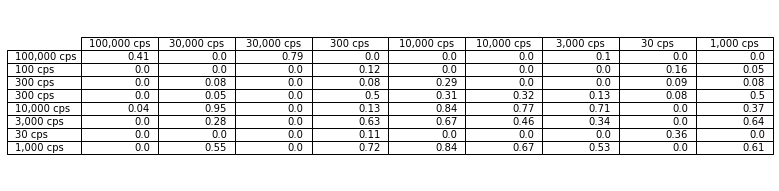

0 means there is negative R2 score


In [172]:

fig, ax = plt.subplots(figsize = [12,3])

# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
ax.table(cellText=np.round(R2mat_test,2), colLabels=testcps, rowLabels=trainincps, loc='center')

fig.tight_layout()
plt.show()
print('0 means there is negative R2 score')

In [173]:
fig.savefig('Cor Table')